In [1]:
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.regularizers import l2
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

2.1.0


## Load Data
First get the data.  Sklearn presents the data in a dictionary.  

The target is the price is thousands

Note that X is a dataframe while y is an array!!

In [2]:
bos = datasets.load_boston()

In [3]:
bos

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
x = pd.DataFrame(bos['data'])

In [5]:
x.columns=bos['feature_names']

In [6]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y = bos['target']

In [63]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Scale Data

Neural Networks are especially sensitive do data scaling.  Nearly all the activation functions saturate at (0,1) or (-1,1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[12], scaler.min_[12]))
multiplied_by = scaler.scale_[12]
added = scaler.min_[12]

scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)

Note: median values were scaled by multiplying by 0.0275938190 and adding -0.047737


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

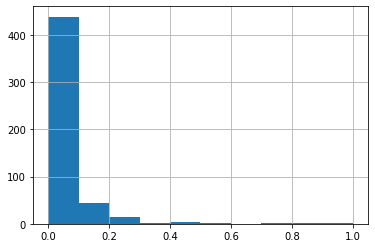

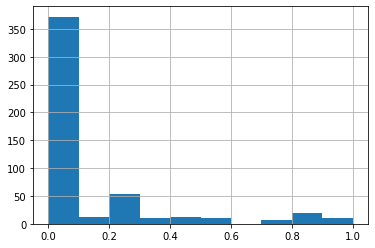

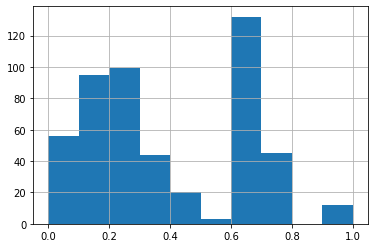

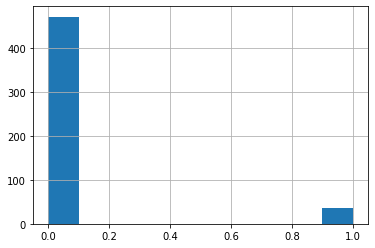

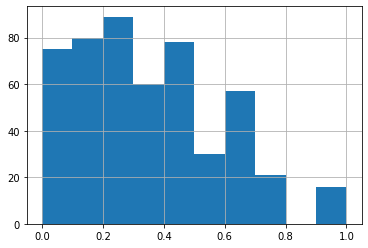

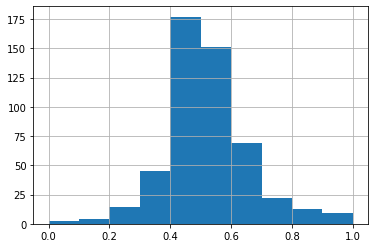

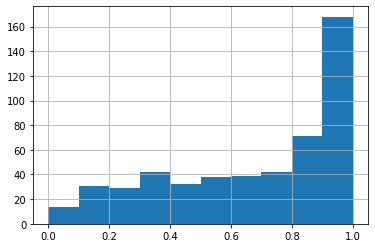

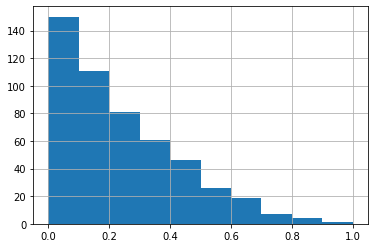

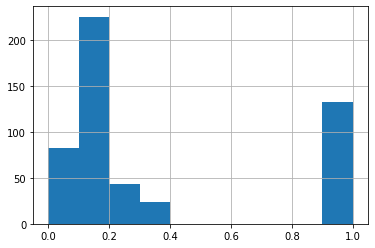

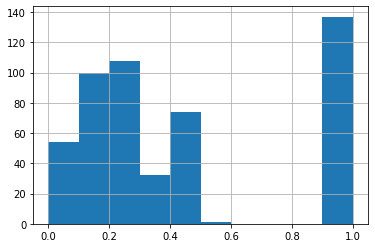

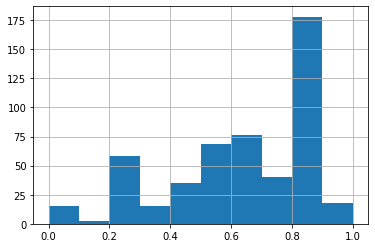

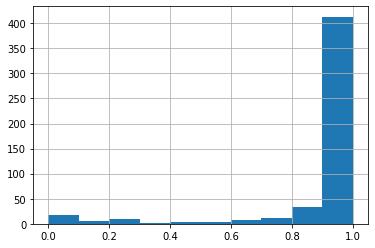

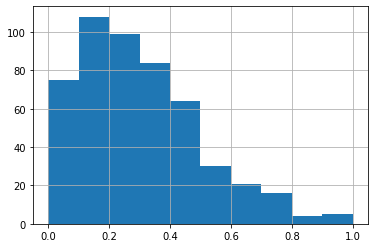

In [10]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

## Model 
Alright lets get down to business.  We will use the Sequential() class to build a model.  This means we just add layer after layer to the model (in order).

Note that this is NOT the keras package proper.  This is an implementation of the Keras API in tensorflow.  THey are closely related, but this IS Tensorflow (package), not Keras (package)

In [11]:
x.shape

(506, 13)

In [18]:
model = tf.keras.Sequential()
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(1))

## Compile Model

The compile step adds an optimizer (solver) and your loss metrics.

In [19]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

## Fit model
Now it is time to train

In [22]:
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

RuntimeError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

In [20]:
model.fit(scaled_train_df.values, y, epochs=10, batch_size=32)

InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

## Visualize that data
Tensorboard allows you to look at your training curves in real time.  All we need to do here is add a "callback" that is executed every epoch end.  Tensorboard writes a summary of the model output.  If you manually build a neural network, you need to add tf.summary operations.

To run tensorboard type

`tensorboard --logdir logs`

Then go to localhost:6006 in your web browser

In [106]:
from time import time
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
tb = TensorBoard(log_dir=f"logs\\{time()}")
es = EarlyStopping(min_delta=0,patience=10)

In [100]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [101]:
model.fit(scaled_train_df.values, y, epochs=5, batch_size=4, callbacks=[tb, es])

Train on 506 samples
Epoch 1/5
420/506 [=======================>......] - ETA: 0s - loss: 20.6130 - mean_squared_error: 20.6130

W0504 18:20:59.913276 31660 callbacks.py:1250] Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


506/506 [==============================] - 1s 1ms/sample - loss: 20.6525 - mean_squared_error: 20.6525
Epoch 2/5
424/506 [========================>.....] - ETA: 0s - loss: 22.1271 - mean_squared_error: 22.1271

W0504 18:21:00.240350 31660 callbacks.py:1250] Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


506/506 [==============================] - 0s 646us/sample - loss: 20.3925 - mean_squared_error: 20.3925
Epoch 3/5
484/506 [===========================>..] - ETA: 0s - loss: 19.3549 - mean_squared_error: 19.3549

W0504 18:21:00.588055 31660 callbacks.py:1250] Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


506/506 [==============================] - 0s 687us/sample - loss: 19.7496 - mean_squared_error: 19.7496
Epoch 4/5
496/506 [============================>.] - ETA: 0s - loss: 20.3499 - mean_squared_error: 20.3499

W0504 18:21:00.924130 31660 callbacks.py:1250] Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


506/506 [==============================] - 0s 662us/sample - loss: 20.2262 - mean_squared_error: 20.2262
Epoch 5/5
464/506 [==========================>...] - ETA: 0s - loss: 19.6259 - mean_squared_error: 19.6259

W0504 18:21:01.288213 31660 callbacks.py:1250] Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error


506/506 [==============================] - 0s 718us/sample - loss: 18.8965 - mean_squared_error: 18.8965


## Validate!!
SO far we have used the entire dataset to train.  We know that Prof Slater frowns upon this.  In Neural Networks, ratter than a cross validation, a validation split is done.  Lets repeat the experiment with splits


In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=1776)

In [110]:
model_final = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:

model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(1))

In [111]:
model_final.compile(optimizer=tf.optimizers.SGD(0.001),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [112]:
out = model_final.fit(x_train.values, y_train, validation_data=(x_test.values,y_test), epochs=1000, batch_size=10,callbacks=[tb,es])

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 1s 2ms/sample - loss: 170.6562 - mean_squared_error: 170.6562 - val_loss: 90.2667 - val_mean_squared_error: 90.2667
Epoch 2/1000
404/404 [==============================] - 0s 451us/sample - loss: 83.8316 - mean_squared_error: 83.8316 - val_loss: 87.4257 - val_mean_squared_error: 87.4258
Epoch 3/1000
404/404 [==============================] - 0s 473us/sample - loss: 83.0593 - mean_squared_error: 83.0593 - val_loss: 91.3639 - val_mean_squared_error: 91.3639
Epoch 4/1000
404/404 [==============================] - 0s 453us/sample - loss: 82.9662 - mean_squared_error: 82.9662 - val_loss: 86.2543 - val_mean_squared_error: 86.2543
Epoch 5/1000
404/404 [==============================] - 0s 451us/sample - loss: 82.8324 - mean_squared_error: 82.8324 - val_loss: 86.8248 - val_mean_squared_error: 86.8248
Epoch 6/1000
404/404 [==============================] - 0s 468us/sample - loss: 81.8616 - mean

404/404 [==============================] - 0s 473us/sample - loss: 39.6251 - mean_squared_error: 39.6251 - val_loss: 54.3798 - val_mean_squared_error: 54.3798
Epoch 49/1000
404/404 [==============================] - 0s 431us/sample - loss: 38.6797 - mean_squared_error: 38.6797 - val_loss: 52.9110 - val_mean_squared_error: 52.9110
Epoch 50/1000
404/404 [==============================] - 0s 411us/sample - loss: 37.7751 - mean_squared_error: 37.7751 - val_loss: 51.9042 - val_mean_squared_error: 51.9042
Epoch 51/1000
404/404 [==============================] - 0s 453us/sample - loss: 37.1305 - mean_squared_error: 37.1305 - val_loss: 53.3860 - val_mean_squared_error: 53.3860
Epoch 52/1000
404/404 [==============================] - 0s 512us/sample - loss: 36.6269 - mean_squared_error: 36.6269 - val_loss: 50.4336 - val_mean_squared_error: 50.4336
Epoch 53/1000
404/404 [==============================] - 0s 453us/sample - loss: 35.8881 - mean_squared_error: 35.8881 - val_loss: 51.1134 - val_mean

404/404 [==============================] - 0s 431us/sample - loss: 19.4635 - mean_squared_error: 19.4636 - val_loss: 30.4373 - val_mean_squared_error: 30.4373
Epoch 96/1000
404/404 [==============================] - 0s 453us/sample - loss: 19.2018 - mean_squared_error: 19.2018 - val_loss: 27.3085 - val_mean_squared_error: 27.3085
Epoch 97/1000
404/404 [==============================] - 0s 411us/sample - loss: 19.1051 - mean_squared_error: 19.1051 - val_loss: 27.8754 - val_mean_squared_error: 27.8754
Epoch 98/1000
404/404 [==============================] - 0s 431us/sample - loss: 19.6994 - mean_squared_error: 19.6994 - val_loss: 27.6995 - val_mean_squared_error: 27.6995
Epoch 99/1000
404/404 [==============================] - 0s 431us/sample - loss: 19.0004 - mean_squared_error: 19.0004 - val_loss: 26.8917 - val_mean_squared_error: 26.8917
Epoch 100/1000
404/404 [==============================] - 0s 431us/sample - loss: 19.3164 - mean_squared_error: 19.3164 - val_loss: 26.6532 - val_mea

404/404 [==============================] - 0s 431us/sample - loss: 17.3440 - mean_squared_error: 17.3440 - val_loss: 26.4697 - val_mean_squared_error: 26.4697
Epoch 143/1000
404/404 [==============================] - 0s 431us/sample - loss: 17.0334 - mean_squared_error: 17.0334 - val_loss: 24.5020 - val_mean_squared_error: 24.5020
Epoch 144/1000
404/404 [==============================] - 0s 431us/sample - loss: 17.2215 - mean_squared_error: 17.2215 - val_loss: 24.5824 - val_mean_squared_error: 24.5824
Epoch 145/1000
404/404 [==============================] - 0s 431us/sample - loss: 17.0654 - mean_squared_error: 17.0654 - val_loss: 23.8564 - val_mean_squared_error: 23.8564
Epoch 146/1000
404/404 [==============================] - 0s 431us/sample - loss: 17.2204 - mean_squared_error: 17.2204 - val_loss: 26.0147 - val_mean_squared_error: 26.0147
Epoch 147/1000
404/404 [==============================] - 0s 453us/sample - loss: 17.3085 - mean_squared_error: 17.3085 - val_loss: 23.5036 - val

## Classification?
The only thing we really need to change is the final layer to predict classes

In [31]:
model_iris = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:

model_iris.add(layers.Dense(100, activation='sigmoid'))
model_iris.add(layers.Dense(100, activation='sigmoid'))
model_iris.add(layers.Dense(3 ,activation='sigmoid'),)

model_iris.compile(optimizer=tf.optimizers.SGD(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [32]:
iris = datasets.load_iris()

In [33]:
x= iris['data']
y = iris['target']
# Why do I not have to scale?
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1776)

In [34]:
model_iris.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=4, callbacks=[tb])

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 4ms/sample - loss: 1.1082 - accuracy: 0.3417 - val_loss: 1.1097 - val_accuracy: 0.3000
Epoch 2/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.1046 - accuracy: 0.3417 - val_loss: 1.1052 - val_accuracy: 0.3000
Epoch 3/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.1010 - accuracy: 0.3417 - val_loss: 1.1014 - val_accuracy: 0.3000
Epoch 4/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.0994 - accuracy: 0.3417 - val_loss: 1.0996 - val_accuracy: 0.3000
Epoch 5/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.0986 - accuracy: 0.3417 - val_loss: 1.0976 - val_accuracy: 0.3000
Epoch 6/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.0984 - accuracy: 0.3417 - val_loss: 1.0960 - val_accuracy: 0.3000
Epoch 7/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.0967 -

Epoch 57/100
120/120 [==============================] - 0s 1ms/sample - loss: 0.8888 - accuracy: 0.7083 - val_loss: 0.8554 - val_accuracy: 0.9333
Epoch 58/100
120/120 [==============================] - 0s 1ms/sample - loss: 0.8714 - accuracy: 0.7167 - val_loss: 0.8503 - val_accuracy: 0.6667
Epoch 59/100
120/120 [==============================] - 0s 1ms/sample - loss: 0.8646 - accuracy: 0.6833 - val_loss: 0.8326 - val_accuracy: 0.7000
Epoch 60/100
120/120 [==============================] - 0s 1ms/sample - loss: 0.8529 - accuracy: 0.6833 - val_loss: 0.8166 - val_accuracy: 0.8667
Epoch 61/100
120/120 [==============================] - 0s 1ms/sample - loss: 0.8382 - accuracy: 0.7167 - val_loss: 0.8044 - val_accuracy: 0.7667
Epoch 62/100
120/120 [==============================] - 0s 1ms/sample - loss: 0.8264 - accuracy: 0.7500 - val_loss: 0.7938 - val_accuracy: 0.7000
Epoch 63/100
120/120 [==============================] - 0s 1ms/sample - loss: 0.8100 - accuracy: 0.7167 - val_loss: 0.7774 -

In [35]:
np.argmax(model_iris.predict(x_test),axis=1)

array([2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 1, 2, 2, 1, 0], dtype=int64)

In [36]:
y_test

array([2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 1, 2, 2, 2, 0])

In [38]:
data = datasets.load_digits()

In [50]:
data['data'][1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [49]:
data['images'][1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [48]:
data['target'][0:30]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9])